In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [2]:
data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
obj = (data.dtypes == 'object')
print('Categorical Variables:',len(list(obj[obj].index)))

Categorical Variables: 7


In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)

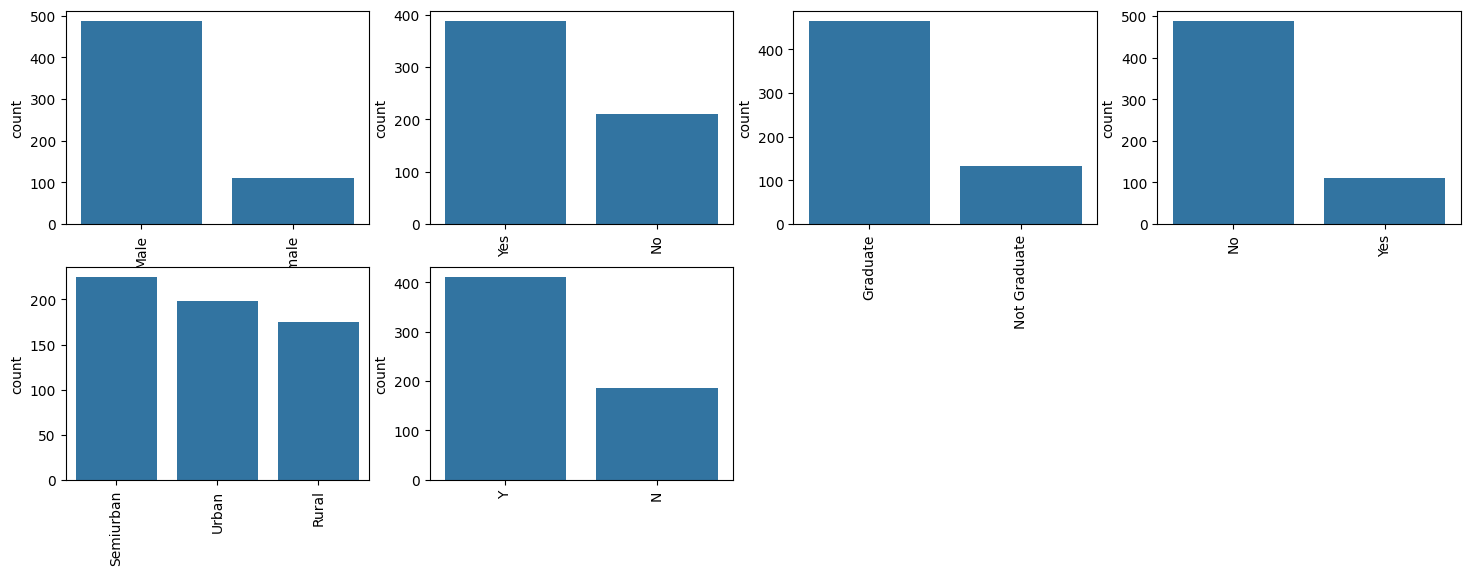

In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

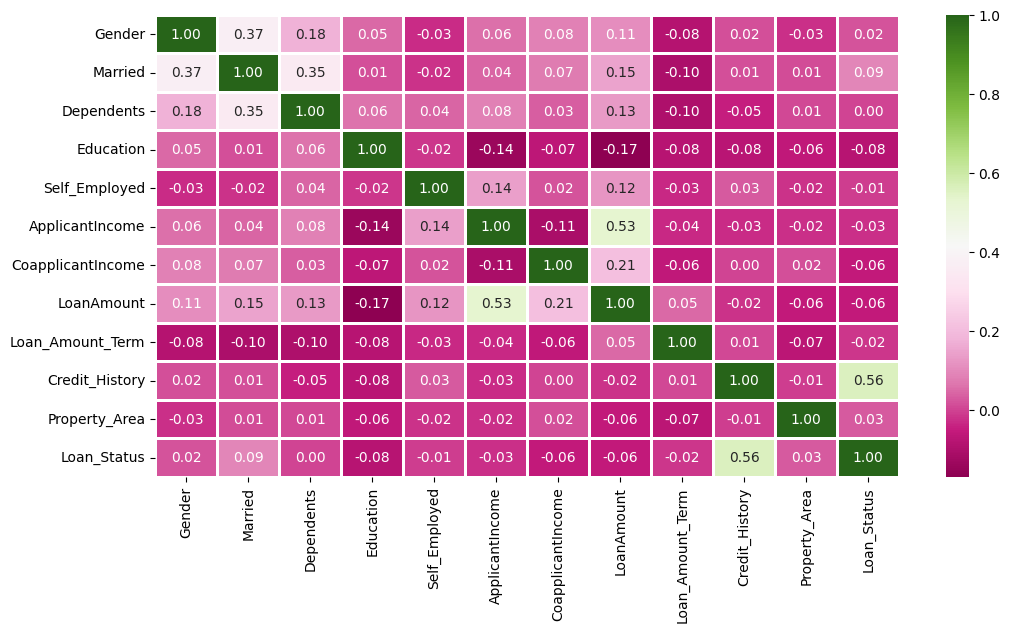

In [7]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='PiYG',fmt='.2f',
            linewidths=2,annot=True)

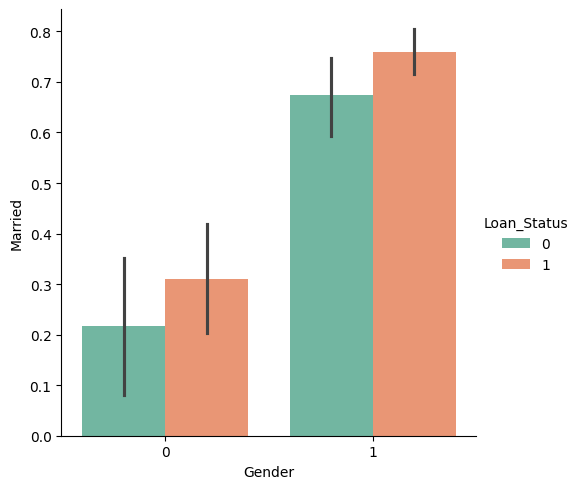

In [8]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data,
            palette="Set2")

In [9]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [11]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
scaler = StandardScaler()
# Fit the scaler ONLY on the training data to learn the scaling parameters
# Then transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note: Using random_state for reproducibility
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
svc = SVC(random_state=42)
# Increased max_iter to prevent the convergence warning you saw earlier
lc = LogisticRegression(max_iter=1000, random_state=42)

print("--- Model Performance ---")
# Loop through a tuple of the initialized models
for clf in (knn, rfc, svc, lc):
    # Fit the model ONCE on the scaled training data
    clf.fit(X_train_scaled, Y_train)

    # Get the model's name for printing
    model_name = clf.__class__.__name__

    # --- Prediction on Training Data ---
    # Use the fitted model to predict on the scaled training data
    train_pred = clf.predict(X_train_scaled)
    train_acc = metrics.accuracy_score(Y_train, train_pred)

    # --- Prediction on Testing Data ---
    # Use the same fitted model to predict on the scaled testing data
    test_pred = clf.predict(X_test_scaled)
    test_acc = metrics.accuracy_score(Y_test, test_pred)

    # Print results in a clear, comparative format
    print(f"Model: {model_name}")
    print(f"  Training Accuracy: {train_acc*100:.2f}%")
    print(f"  Testing Accuracy:  {test_acc*100:.2f}%")
    print("-" * 25)

--- Model Performance ---
Model: KNeighborsClassifier
  Training Accuracy: 81.28%
  Testing Accuracy:  76.67%
-------------------------
Model: RandomForestClassifier
  Training Accuracy: 100.00%
  Testing Accuracy:  80.42%
-------------------------
Model: SVC
  Training Accuracy: 81.01%
  Testing Accuracy:  81.25%
-------------------------
Model: LogisticRegression
  Training Accuracy: 80.45%
  Testing Accuracy:  82.08%
-------------------------
